# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/machinelearning-az.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [ ]:
!pip install sklearn

# Kernel SVM

# Cómo importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables

In [4]:
# Como sigue siendo SVM, y en el contexto del problema nos es útil, seguimos aplicando el reescalado
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Ajustar el clasificador en el Conjunto de Entrenamiento

In [5]:
from sklearn.svm import SVC

In [27]:
classifier = SVC(kernel = "rbf", random_state = 0) # C: parámetro de penalización, kernel: rbf (círculo), poly (irregular) o sigmoid (de un lado y de otro, bin) como no lineales, degree: para poly, gamma: para alterar divisiones 
classifier.fit(X_train, y_train)
print(classifier.get_params()) # para ver los parámetros de la regresión hecha
print(classifier.score(X_train,y_train)) # vemos el accuracy de la predicción de la clasificación (con datos de entrenamiento)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.9133333333333333


# Predicción de los resultados con el Conjunto de Testing

In [28]:
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
# Vemos que el accuracy del modelo con respecto a los datos de test (sin tomar desbalanceo entre clases) es de 93/100 = 0,93
# En este caso, solo 4 observaciones fueron catalogadas como compras cuando en verdad no lo fueron, y 3 observaciones fueron catalogadas como no compras cuando en verdad lo fueron
# (no compras acertadas:64, compras acertadas:29)

array([[64,  4],
       [ 3, 29]], dtype=int64)

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

In [14]:
from matplotlib.colors import ListedColormap

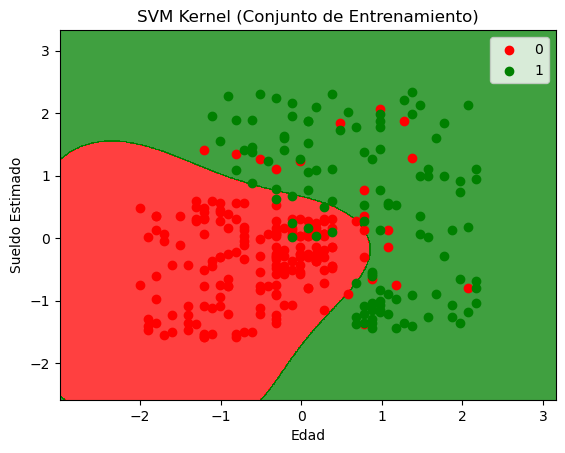

In [30]:
# Vemos el límite de nuestro clasificador (frontera de decisión) con respecto a los datos de train (91,33% de accuracy antes marcado). Usamos 2 variables indep para visualizar la clasificación en un gráfico 2D (podemos usar 3 para 3D, o reducir dimensiones si tenemos más))
# Crear el grid para el contorno
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Predecir sobre el grid de puntos y reshape para contorno
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Definir la paleta de colores usando códigos RGB 
colors = [(1, 0, 0), (0, 0.5, 0)] # rojo (no compra) y verde oscuro (compra) [(valor 0 de pred, valor 1 de pred)]
cmap = ListedColormap(colors)

# Graficar el contorno y los puntos de datos
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de datos con scatter
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=cmap(i), label=j)
plt.title('SVM Kernel (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Vemos que la separación no es lineal. Pareciera que los 'círculos' se generan en torno a la no compra
# A pesar de que hay algunos errores, vemos que el algoritmo no se ha sobreajustado tratando de incluir a las observaciones mal categorizadas, sino que ha sabido captar las tendencias y patrones necesarios para distinguir la mayoria de casos
# Este sobreajute lo podríamos ver, en el caso de aplicar un SVM poly de grado muy elevado, que trataría de captar todos los datos puntualmente, posiblemente perdiendo en tal caso capacidad de predecir nuevos casos
# Vemos que hemos encontrado un buen mapeo de los datos en una dimensión superior que me permita, en la misma, separar las categorias a través de un hiperplano (n-1), para luego proyectarse en la dimensión original como un separador no lineal

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing


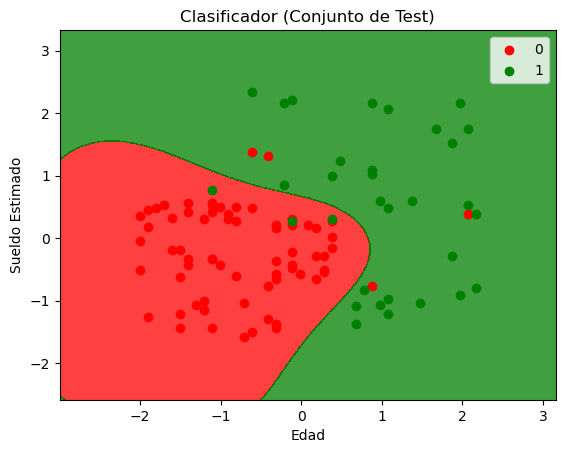

In [31]:
# Vemos el límite de nuestro clasificador (frontera de decisión) con respecto a los datos de test (93% de accuracy antes marcado). Similar análisis que con la matriz de confusión.
# Aplica la misma frontera de decisión conseguida con train a los datos de test. Análisis similar al de la matriz de confusión

# Crear el grid para el contorno
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Predecir sobre el grid de puntos y reshape para contorno
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Definir la paleta de colores usando códigos RGB 
colors = [(1, 0, 0), (0, 0.5, 0)] # rojo (no compra) y verde oscuro (compra) [(valor 0 de pred, valor 1 de pred)]
cmap = ListedColormap(colors)

# Graficar el contorno y los puntos de datos
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de datos con scatter
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=cmap(i), label=j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()
